# Analysis of Expression Data

In [1]:
import init
from common import constants as cn
from common.data_provider import DataProvider
from plots.cv_plotter import CVPlotter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Initialize the data
provider = DataProvider()
provider.do()

In [3]:
plotter = CVPlotter(provider=provider)

## Variability Analysis By Time and Gene

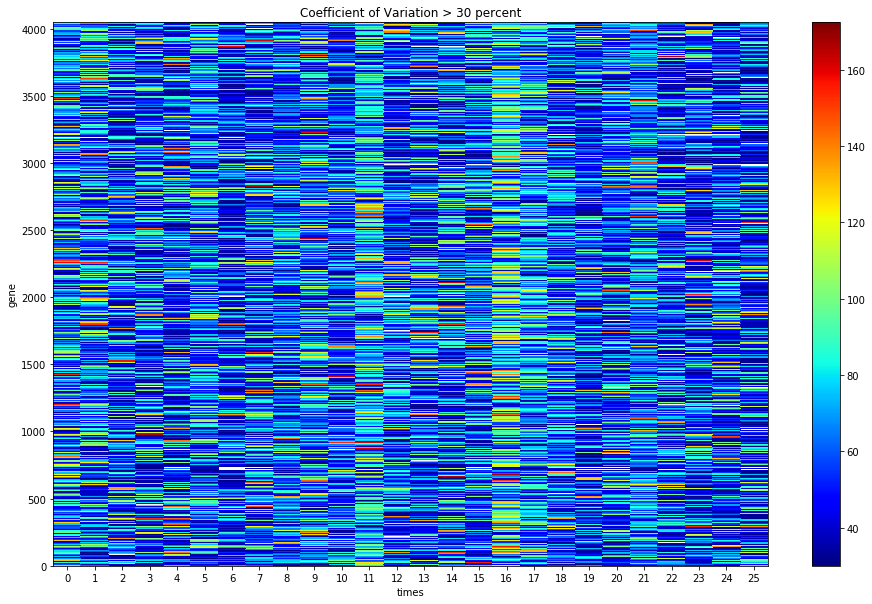

In [4]:
plotter.heatMap(min_cv=30)

**Observation**
1. Variation in expression may be a result of variations in DO. Plot average CV for genes at a time vs. CV of DO for the same time (or maybe just do two line plots, x-axis is time).
1. Don't get same patterns of high CVs if subtract mean for replication for each gene.

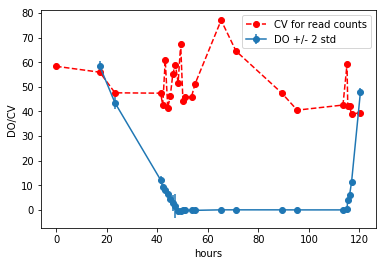

In [5]:
# Relationship between CV of DO and average CV of Gene at each time.
plotter.readsAndDO()

## Analyses

1. What is the variability of expression for each time period (by looking at the replicas)?
1. How well can the states in the publication be reproduced using techniques other than t-SNE (e.g., k-means clusters)?
1. Can we estimate error bars for the state assignments? We would expect larger error bars for time periods that are transitions between states and smaller error bars within the state.
1. Algorithm
   1. Eliminating extraneous genes with an F-test comparing the variance of replications to across times
   1. Do PCA on the remaining variables and cluster by 2 components
   1. Use the PCA coordinates to classify new observations
   1. Evaluate algorithm quality by cross validation

## Notes
1. There are 1598 genes in the "reads" file that are not in the gene_data file.
1. Used the following to calculate sum of squares: $\sum_n^N (x_n - \bar{x})^2 = \sum_n^N x^2_n - \sum_n^N 2 x_n \bar{x} + N \bar{x}^2 - \bar{x})^2 = \sum_n^N x^2_n -  2 N \bar{x}^2 + N \bar{x}^2 = \sum_n^N x^2_n -  N \bar{x}^2$
1. In hypoxia_curve_DO at T2, there is no average even though there are values for each reaction?